In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.rc('font',family='malgun gothic')
plt.rc('axes',unicode_minus=False)
import seaborn as sns

# EDA
import klib

# Preprocessing&Feature Engineering
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer, RobustScaler, MaxAbsScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectPercentile
from gensim.models import word2vec

# Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from bayes_opt import BayesianOptimization
import kerastuner as kt

# Modeling
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, ARDRegression, BayesianRidge, Lars
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import VotingRegressor, StackingRegressor
from sklearn.neural_network import MLPRegressor
import tensorflow as tf
from vecstack import StackingTransformer
from vecstack import stacking

# Eveluation
from sklearn.metrics import mean_squared_error # squared=False시 RMSE
from sklearn.model_selection import cross_val_score

# Utility
import os
import time
import random
import warnings; warnings.filterwarnings("ignore")
from IPython.display import Image
import pickle
from tqdm import tqdm
import platform
from itertools import combinations
from scipy.stats.mstats import gmean
import pickle

### Read Data

In [2]:
df_train = pd.read_csv(os.path.abspath("../input")+'/X_train.csv', encoding='cp949')
y_train = pd.read_csv(os.path.abspath("../input")+'/y_train.csv', encoding='cp949').set_index('custid')
df_test = pd.read_csv(os.path.abspath("../input")+'/X_test.csv', encoding='cp949')
test_id = df_test['custid'].unique()

In [3]:
with open(os.path.abspath("../input")+'/1st_train_features.pkl','rb') as f:
    x_train = pickle.load(f)
with open(os.path.abspath("../input")+'/1st_test_features.pkl','rb') as f:
    x_test = pickle.load(f)

In [77]:
x_test = np.array(pd.DataFrame(x_test).fillna(0))

### Model Tuning

In [10]:
x_train2, x_dev, y_train2, y_dev = train_test_split(x_train, y_train, test_size=0.3, random_state=0)

In [11]:
pbounds = {
    'alpha':(0,50)
}
def rid_opt(alpha):
    params = {
        'alpha':alpha
    }
    rid = Ridge(random_state=0, **params)
    rid.fit(x_train2,y_train2)
    score = mean_squared_error(rid.predict(x_dev),y_dev,squared=False)
    return -score
BO_rid = BayesianOptimization(rid_opt, pbounds, random_state=0)
BO_rid.maximize(init_points=50, n_iter=50) # init_points: exploration, n_iter: iteration

|   iter    |  target   |   alpha   |
-------------------------------------
|  1        | -8.473    |  27.44    |
|  2        | -8.466    |  35.76    |
|  3        | -8.471    |  30.14    |
|  4        | -8.473    |  27.24    |
|  5        | -8.48     |  21.18    |
|  6        | -8.469    |  32.29    |
|  7        | -8.479    |  21.88    |
|  8        | -8.46     |  44.59    |
|  9        | -8.458    |  48.18    |
|  10       | -8.483    |  19.17    |
|  11       | -8.463    |  39.59    |
|  12       | -8.474    |  26.44    |
|  13       | -8.472    |  28.4     |
|  14       | -8.459    |  46.28    |
|  15       | -8.515    |  3.552    |
|  16       | -8.513    |  4.356    |
|  17       | -8.523    |  1.011    |
|  18       | -8.462    |  41.63    |
|  19       | -8.464    |  38.91    |
|  20       | -8.461    |  43.5     |
|  21       | -8.457    |  48.93    |
|  22       | -8.463    |  39.96    |
|  23       | -8.478    |  23.07    |
|  24       | -8.464    |  39.03    |
|  25       

In [12]:
pbounds = {
    'alpha':(0,50)
}
def las_opt(alpha):
    params = {
        'alpha':alpha
    }
    las = Lasso(random_state=0, **params)
    las.fit(x_train2,y_train2)
    score = mean_squared_error(las.predict(x_dev),y_dev,squared=False)
    return -score
BO_las = BayesianOptimization(las_opt, pbounds, random_state=0)
BO_las.maximize(init_points=50, n_iter=50) # init_points: exploration, n_iter: iteration

|   iter    |  target   |   alpha   |
-------------------------------------
|  1        | -10.43    |  27.44    |
|  2        | -10.43    |  35.76    |
|  3        | -10.43    |  30.14    |
|  4        | -10.43    |  27.24    |
|  5        | -10.43    |  21.18    |
|  6        | -10.43    |  32.29    |
|  7        | -10.43    |  21.88    |
|  8        | -10.43    |  44.59    |
|  9        | -10.43    |  48.18    |
|  10       | -10.43    |  19.17    |
|  11       | -10.43    |  39.59    |
|  12       | -10.43    |  26.44    |
|  13       | -10.43    |  28.4     |
|  14       | -10.43    |  46.28    |
|  15       | -10.08    |  3.552    |
|  16       | -10.39    |  4.356    |
|  17       | -9.121    |  1.011    |
|  18       | -10.43    |  41.63    |
|  19       | -10.43    |  38.91    |
|  20       | -10.43    |  43.5     |
|  21       | -10.43    |  48.93    |
|  22       | -10.43    |  39.96    |
|  23       | -10.43    |  23.07    |
|  24       | -10.43    |  39.03    |
|  25       

In [13]:
pbounds = {
    'alpha':(0,50)
}
def ela_opt(alpha):
    params = {
        'alpha':alpha
    }
    ela = ElasticNet(random_state=0, **params)
    ela.fit(x_train2,y_train2)
    score = mean_squared_error(ela.predict(x_dev),y_dev,squared=False)
    return -score
BO_ela = BayesianOptimization(ela_opt, pbounds, random_state=0)
BO_ela.maximize(init_points=50, n_iter=50) # init_points: exploration, n_iter: iteration

|   iter    |  target   |   alpha   |
-------------------------------------
|  1        | -10.43    |  27.44    |
|  2        | -10.43    |  35.76    |
|  3        | -10.43    |  30.14    |
|  4        | -10.43    |  27.24    |
|  5        | -10.43    |  21.18    |
|  6        | -10.43    |  32.29    |
|  7        | -10.43    |  21.88    |
|  8        | -10.43    |  44.59    |
|  9        | -10.43    |  48.18    |
|  10       | -10.43    |  19.17    |
|  11       | -10.43    |  39.59    |
|  12       | -10.43    |  26.44    |
|  13       | -10.43    |  28.4     |
|  14       | -10.43    |  46.28    |
|  15       | -9.907    |  3.552    |
|  16       | -10.13    |  4.356    |
|  17       | -8.886    |  1.011    |
|  18       | -10.43    |  41.63    |
|  19       | -10.43    |  38.91    |
|  20       | -10.43    |  43.5     |
|  21       | -10.43    |  48.93    |
|  22       | -10.43    |  39.96    |
|  23       | -10.43    |  23.07    |
|  24       | -10.43    |  39.03    |
|  25       

In [14]:
pbounds = {
    'n_iter':(100,1000),
    'alpha_1':(0,50),
    'alpha_2':(0,50),
    'lambda_1':(0,10),
    'lambda_2':(0,10)
}
def ard_opt(n_iter,alpha_1,alpha_2,lambda_1,lambda_2):
    params = {
        'n_iter':int(round(n_iter)),
        'alpha_1':alpha_1,
        'alpha_2':alpha_2,
        'lambda_1':lambda_1,
        'lambda_2':lambda_2
    }
    ard = ARDRegression(**params)
    ard.fit(x_train2,y_train2)
    score = mean_squared_error(ard.predict(x_dev),y_dev,squared=False)
    return -score
BO_ard = BayesianOptimization(ard_opt, pbounds, random_state=0)
BO_ard.maximize(init_points=50, n_iter=50) # init_points: exploration, n_iter: iteration

|   iter    |  target   |  alpha_1  |  alpha_2  | lambda_1  | lambda_2  |  n_iter   |
-------------------------------------------------------------------------------------
|  1        | -8.446    |  27.44    |  35.76    |  6.028    |  5.449    |  481.3    |
|  2        | -8.451    |  32.29    |  21.88    |  8.918    |  9.637    |  445.1    |
|  3        | -8.462    |  39.59    |  26.44    |  5.68     |  9.256    |  163.9    |
|  4        | -8.447    |  4.356    |  1.011    |  8.326    |  7.782    |  883.0    |
|  5        | -8.463    |  48.93    |  39.96    |  4.615    |  7.805    |  206.4    |
|  6        | -8.435    |  32.0     |  7.168    |  9.447    |  5.218    |  473.2    |
|  7        | -8.454    |  13.23    |  38.71    |  4.562    |  5.684    |  116.9    |
|  8        | -8.46     |  30.88    |  30.6     |  6.169    |  9.437    |  713.6    |
|  9        | -8.411    |  17.98    |  21.85    |  6.976    |  0.6023   |  700.1    |
|  10       | -8.471    |  33.53    |  10.52    |  1.2

|  58       | -8.451    |  29.42    |  1.553    |  2.901    |  3.325    |  813.6    |
|  59       | -8.417    |  14.59    |  10.67    |  4.26     |  1.084    |  285.8    |
|  60       | -8.469    |  2.903    |  3.659    |  1.658    |  3.743    |  167.3    |
|  61       | -8.411    |  11.39    |  10.82    |  7.056    |  0.7653   |  284.6    |
|  62       | -8.411    |  27.02    |  3.936    |  3.344    |  0.7039   |  812.2    |
|  63       | -8.444    |  11.94    |  10.18    |  0.8703   |  0.8418   |  286.1    |
|  64       | -8.442    |  24.21    |  5.537    |  4.578    |  3.595    |  814.0    |
|  65       | -8.421    |  13.78    |  16.03    |  6.793    |  1.922    |  281.5    |
|  66       | -8.416    |  15.79    |  10.69    |  7.804    |  1.3      |  287.0    |
|  67       | -8.428    |  13.75    |  13.91    |  8.882    |  3.535    |  290.6    |
|  68       | -8.433    |  9.538    |  12.56    |  5.356    |  2.84     |  289.7    |
|  69       | -8.456    |  26.29    |  12.45    |  2.3

In [15]:
pbounds = {
    'n_iter':(100,1000),
    'alpha_1':(0,50),
    'alpha_2':(0,50),
    'lambda_1':(0,10),
    'lambda_2':(0,10)
}
def bay_opt(n_iter,alpha_1,alpha_2,lambda_1,lambda_2):
    params = {
        'n_iter':int(round(n_iter)),
        'alpha_1':alpha_1,
        'alpha_2':alpha_2,
        'lambda_1':lambda_1,
        'lambda_2':lambda_2
    }
    bay = BayesianRidge(**params)
    bay.fit(x_train2,y_train2)
    score = mean_squared_error(bay.predict(x_dev),y_dev,squared=False)
    return -score
BO_bay = BayesianOptimization(bay_opt, pbounds, random_state=0)
BO_bay.maximize(init_points=50, n_iter=50)

|   iter    |  target   |  alpha_1  |  alpha_2  | lambda_1  | lambda_2  |  n_iter   |
-------------------------------------------------------------------------------------
|  1        | -8.421    |  27.44    |  35.76    |  6.028    |  5.449    |  481.3    |
|  2        | -8.421    |  32.29    |  21.88    |  8.918    |  9.637    |  445.1    |
|  3        | -8.421    |  39.59    |  26.44    |  5.68     |  9.256    |  163.9    |
|  4        | -8.421    |  4.356    |  1.011    |  8.326    |  7.782    |  883.0    |
|  5        | -8.421    |  48.93    |  39.96    |  4.615    |  7.805    |  206.4    |
|  6        | -8.421    |  32.0     |  7.168    |  9.447    |  5.218    |  473.2    |
|  7        | -8.421    |  13.23    |  38.71    |  4.562    |  5.684    |  116.9    |
|  8        | -8.421    |  30.88    |  30.6     |  6.169    |  9.437    |  713.6    |
|  9        | -8.421    |  17.98    |  21.85    |  6.976    |  0.6023   |  700.1    |
|  10       | -8.42     |  33.53    |  10.52    |  1.2

|  58       | -8.421    |  12.57    |  39.4     |  9.373    |  1.895    |  946.9    |
|  59       | -8.421    |  0.2782   |  35.8     |  4.753    |  5.738    |  667.4    |
|  60       | -8.421    |  30.3     |  45.02    |  1.963    |  5.088    |  918.7    |
|  61       | -8.42     |  20.4     |  31.17    |  7.575    |  3.315    |  931.2    |
|  62       | -8.421    |  7.032    |  28.94    |  8.008    |  6.72     |  222.4    |
|  63       | -8.421    |  27.61    |  23.78    |  5.57     |  5.285    |  944.2    |
|  64       | -8.42     |  22.68    |  38.56    |  4.779    |  4.159    |  935.0    |
|  65       | -8.421    |  38.25    |  20.47    |  7.013    |  6.421    |  189.8    |
|  66       | -8.421    |  48.42    |  47.68    |  9.925    |  1.75     |  158.1    |
|  67       | -8.421    |  8.124    |  38.76    |  9.54     |  0.4314   |  899.8    |
|  68       | -8.421    |  11.87    |  12.61    |  1.196    |  8.468    |  325.3    |
|  69       | -8.421    |  20.86    |  12.95    |  0.4

In [16]:
pbounds = {
    'n_estimators':(100,1000),
    'learning_rate':(0,1),
    'max_depth':(2, 32),
    'num_leaves':(2, 64),
    'min_child_samples':(10, 200),
    'min_child_weight':(1, 50),
    'subsample':(0.5, 1),
    'colsample_bytree':(0.5, 1),
    'max_bin':(10, 500),
    'reg_lambda':(0.001, 10),
    'reg_alpha':(0.01, 50)
}
def lgbm_opt(n_estimators, learning_rate, max_depth, num_leaves, min_child_samples, min_child_weight,
             subsample, colsample_bytree, max_bin, reg_lambda, reg_alpha):
    params = {
        "n_estimators":int(round(n_estimators)), 
        "learning_rate":learning_rate,
        'max_depth':int(round(max_depth)),
        'num_leaves':int(round(num_leaves)),
        'min_child_samples': int(round(min_child_samples)),
        'min_child_weight': int(round(min_child_weight)),
        'subsample':max(min(subsample, 1), 0),
        'colsample_bytree':max(min(colsample_bytree, 1), 0),
        'reg_lambda': reg_lambda,
        'reg_alpha': reg_alpha
    }
    lgbm = LGBMRegressor(random_state=0, **params)
    lgbm.fit(x_train2,y_train2)
    score = mean_squared_error(lgbm.predict(x_dev),y_dev,squared=False)
    return -score
BO_lgbm = BayesianOptimization(lgbm_opt, pbounds, random_state=0)
BO_lgbm.maximize(init_points=50, n_iter=50)

|   iter    |  target   | colsam... | learni... |  max_bin  | max_depth | min_ch... | min_ch... | n_esti... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------------------------------
|  1        | -9.663    |  0.7744   |  0.7152   |  305.4    |  18.35    |  90.49    |  32.65    |  493.8    |  57.29    |  48.18    |  3.835    |  0.8959   |
|  2        | -9.198    |  0.7644   |  0.568    |  463.5    |  4.131    |  26.55    |  1.991    |  849.4    |  50.25    |  43.5     |  9.786    |  0.8996   |
|  3        | -9.904    |  0.7307   |  0.7805   |  67.95    |  21.2     |  37.24    |  47.29    |  569.7    |  27.71    |  13.24    |  7.743    |  0.7281   |
|  4        | -8.063    |  0.7842   |  0.01879  |  312.6    |  20.36    |  127.2    |  47.24    |  713.6    |  24.29    |  21.86    |  6.977    |  0.5301   |
|  5        | -9.474    |  0.8334   |  0.6706   |  1

|  31       | -9.95     |  0.5906   |  0.7885   |  37.86    |  22.91    |  158.0    |  39.09    |  333.5    |  25.18    |  29.38    |  2.729    |  0.6854   |
|  32       | -8.953    |  0.5985   |  0.4599   |  31.86    |  25.99    |  24.62    |  26.42    |  376.1    |  37.81    |  47.97    |  6.456    |  0.5177   |
|  33       | -9.245    |  0.7152   |  0.51     |  272.7    |  22.44    |  62.74    |  7.314    |  453.4    |  61.3     |  9.365    |  9.04     |  0.7719   |
|  34       | -10.52    |  0.7285   |  0.882    |  234.7    |  23.73    |  85.81    |  45.3     |  721.0    |  45.38    |  16.39    |  7.568    |  0.818    |
|  35       | -8.352    |  0.62     |  0.1605   |  400.2    |  30.77    |  97.05    |  29.96    |  872.0    |  30.35    |  47.59    |  5.758    |  0.9104   |
|  36       | -10.03    |  0.9544   |  0.8155   |  88.11    |  20.87    |  85.7     |  4.073    |  481.6    |  18.04    |  42.45    |  0.334    |  0.9795   |
|  37       | -8.702    |  0.6777   |  0.3567   |  1

|  63       | -9.709    |  0.9796   |  0.7223   |  51.32    |  3.758    |  101.6    |  24.2     |  847.7    |  61.99    |  40.38    |  9.155    |  0.6278   |
|  64       | -9.772    |  0.7356   |  0.7135   |  488.5    |  9.391    |  58.16    |  3.945    |  808.2    |  13.75    |  29.08    |  0.3623   |  0.826    |
|  65       | -8.801    |  0.6494   |  0.3711   |  95.2     |  27.03    |  59.61    |  27.15    |  750.1    |  56.99    |  48.03    |  2.136    |  0.9709   |
|  66       | -10.29    |  0.6605   |  0.8269   |  21.69    |  6.07     |  103.9    |  48.36    |  448.1    |  25.99    |  15.68    |  2.526    |  0.9264   |
|  67       | -8.621    |  0.7637   |  0.001914 |  312.3    |  19.34    |  121.8    |  43.99    |  714.1    |  22.72    |  17.79    |  7.101    |  0.7602   |
|  68       | -8.456    |  0.6773   |  0.2712   |  38.97    |  10.57    |  131.4    |  7.819    |  288.2    |  13.94    |  29.63    |  9.091    |  0.5968   |
|  69       | -9.736    |  0.6716   |  0.6738   |  2

|  95       | -10.26    |  0.5915   |  0.8848   |  422.4    |  4.901    |  192.0    |  29.31    |  997.7    |  37.74    |  34.89    |  4.982    |  0.7188   |
|  96       | -8.778    |  0.5663   |  0.3277   |  285.1    |  26.67    |  118.4    |  29.2     |  683.6    |  39.87    |  42.44    |  6.335    |  0.6376   |
|  97       | -10.11    |  0.6791   |  0.7894   |  297.4    |  14.82    |  37.22    |  12.59    |  895.9    |  38.48    |  16.15    |  5.271    |  0.9826   |
|  98       | -9.003    |  0.6166   |  0.4523   |  24.02    |  5.59     |  93.81    |  8.643    |  325.7    |  27.52    |  18.51    |  0.3086   |  0.5183   |
|  99       | -9.605    |  0.6984   |  0.6325   |  419.0    |  9.997    |  187.6    |  27.5     |  982.0    |  48.23    |  25.89    |  2.976    |  0.7618   |
|  100      | -8.207    |  0.5111   |  0.09371  |  312.9    |  14.69    |  45.71    |  17.27    |  889.0    |  39.94    |  18.38    |  8.042    |  0.7371   |


In [17]:
max_params_rid = BO_rid.max['params']
max_params_las = BO_las.max['params']
max_params_ela = BO_ela.max['params']
max_params_ard = BO_ard.max['params']
max_params_bay = BO_bay.max['params']
max_params_lgbm = BO_lgbm.max['params']

In [18]:
max_params_ard['n_iter'] = int(round(max_params_ard['n_iter']))

max_params_bay['n_iter'] = int(round(max_params_bay['n_iter']))

max_params_lgbm['num_leaves'] = int(round(max_params_lgbm['num_leaves']))
max_params_lgbm['n_estimators'] = int(round(max_params_lgbm['n_estimators']))
max_params_lgbm['max_depth'] = int(round(max_params_lgbm['max_depth']))
max_params_lgbm['min_child_samples'] = int(round(max_params_lgbm['min_child_samples']))
max_params_lgbm['min_child_weight'] = int(round(max_params_lgbm['min_child_weight']))
max_params_lgbm['max_bin'] = int(round(max_params_lgbm['max_bin']))
max_params_lgbm['subsample'] = max(min(max_params_lgbm['subsample'], 1), 0)
max_params_lgbm['colsample_bytree'] = max(min(max_params_lgbm['colsample_bytree'], 1), 0)

In [22]:
print(max_params_rid,'\n',max_params_las,'\n',max_params_ela,'\n',max_params_ard,'\n',max_params_bay,'\n',max_params_lgbm)

{'alpha': 50.0} 
 {'alpha': 0.017247204559639462} 
 {'alpha': 0.008322067013427636} 
 {'alpha_1': 26.051830310206466, 'alpha_2': 2.7168994169626814, 'lambda_1': 1.9999652489640007, 'lambda_2': 0.18521794460613972, 'n_iter': 814} 
 {'alpha_1': 1.9593896127160337, 'alpha_2': 14.140348128820479, 'lambda_1': 1.201965612131689, 'lambda_2': 2.9614019752214493, 'n_iter': 207} 
 {'colsample_bytree': 0.7842169744343243, 'learning_rate': 0.018789800436355142, 'max_bin': 313, 'max_depth': 20, 'min_child_samples': 127, 'min_child_weight': 47, 'n_estimators': 714, 'num_leaves': 24, 'reg_alpha': 21.857227370429083, 'reg_lambda': 6.976614328076722, 'subsample': 0.5301127358146349}


In [19]:
regs_tuned = [Ridge(random_state=0, **max_params_rid),Lasso(random_state=0, **max_params_las),ElasticNet(random_state=0, **max_params_ela),
             ARDRegression(**max_params_ard),BayesianRidge(**max_params_bay),LGBMRegressor(random_state=0,**max_params_lgbm),CatBoostRegressor(random_state=0)]
regs_tuned = [(str(reg).split('(')[0], reg) for reg in regs_tuned]
regs_tuned[-1] = list(regs_tuned[-1])
regs_tuned[-1][0] = 'CatBoostRegressor'
regs_tuned[-1] = tuple(regs_tuned[-1])

regs_trained = [(name, reg.fit(x_train2,y_train2), float(mean_squared_error(reg.predict(x_dev),y_dev,squared=False))) 
                    for name, reg in tqdm(regs_tuned.copy())]

 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:50<00:24, 24.41s/it]

Learning rate set to 0.063286
0:	learn: 10.2873270	total: 281ms	remaining: 4m 40s
1:	learn: 10.1385189	total: 389ms	remaining: 3m 14s
2:	learn: 9.9993897	total: 486ms	remaining: 2m 41s
3:	learn: 9.8782563	total: 583ms	remaining: 2m 25s
4:	learn: 9.7607923	total: 695ms	remaining: 2m 18s
5:	learn: 9.6592528	total: 791ms	remaining: 2m 11s
6:	learn: 9.5583591	total: 888ms	remaining: 2m 5s
7:	learn: 9.4731899	total: 984ms	remaining: 2m 1s
8:	learn: 9.3852209	total: 1.09s	remaining: 1m 59s
9:	learn: 9.3092881	total: 1.19s	remaining: 1m 57s
10:	learn: 9.2326907	total: 1.3s	remaining: 1m 57s
11:	learn: 9.1730827	total: 1.42s	remaining: 1m 56s
12:	learn: 9.1075309	total: 1.53s	remaining: 1m 56s
13:	learn: 9.0510202	total: 1.66s	remaining: 1m 56s
14:	learn: 8.9940825	total: 1.77s	remaining: 1m 56s
15:	learn: 8.9451298	total: 1.89s	remaining: 1m 56s
16:	learn: 8.8959775	total: 2.01s	remaining: 1m 56s
17:	learn: 8.8545526	total: 2.11s	remaining: 1m 55s
18:	learn: 8.8102633	total: 2.25s	remaining: 

158:	learn: 7.6708628	total: 19.3s	remaining: 1m 42s
159:	learn: 7.6665275	total: 19.4s	remaining: 1m 42s
160:	learn: 7.6622698	total: 19.6s	remaining: 1m 41s
161:	learn: 7.6584909	total: 19.7s	remaining: 1m 41s
162:	learn: 7.6548103	total: 19.8s	remaining: 1m 41s
163:	learn: 7.6509303	total: 19.9s	remaining: 1m 41s
164:	learn: 7.6459337	total: 20s	remaining: 1m 41s
165:	learn: 7.6434465	total: 20.1s	remaining: 1m 41s
166:	learn: 7.6382525	total: 20.2s	remaining: 1m 40s
167:	learn: 7.6350751	total: 20.4s	remaining: 1m 40s
168:	learn: 7.6280695	total: 20.5s	remaining: 1m 40s
169:	learn: 7.6236675	total: 20.6s	remaining: 1m 40s
170:	learn: 7.6197365	total: 20.7s	remaining: 1m 40s
171:	learn: 7.6134958	total: 20.8s	remaining: 1m 40s
172:	learn: 7.6116748	total: 20.9s	remaining: 1m 39s
173:	learn: 7.6067543	total: 21s	remaining: 1m 39s
174:	learn: 7.6024891	total: 21.1s	remaining: 1m 39s
175:	learn: 7.5957310	total: 21.2s	remaining: 1m 39s
176:	learn: 7.5902378	total: 21.4s	remaining: 1m 3

314:	learn: 7.0635010	total: 36.2s	remaining: 1m 18s
315:	learn: 7.0588788	total: 36.3s	remaining: 1m 18s
316:	learn: 7.0559099	total: 36.5s	remaining: 1m 18s
317:	learn: 7.0533940	total: 36.6s	remaining: 1m 18s
318:	learn: 7.0492069	total: 36.7s	remaining: 1m 18s
319:	learn: 7.0464887	total: 36.8s	remaining: 1m 18s
320:	learn: 7.0420918	total: 36.9s	remaining: 1m 18s
321:	learn: 7.0383590	total: 37s	remaining: 1m 17s
322:	learn: 7.0345281	total: 37.1s	remaining: 1m 17s
323:	learn: 7.0311904	total: 37.2s	remaining: 1m 17s
324:	learn: 7.0268855	total: 37.3s	remaining: 1m 17s
325:	learn: 7.0237211	total: 37.4s	remaining: 1m 17s
326:	learn: 7.0212257	total: 37.5s	remaining: 1m 17s
327:	learn: 7.0180626	total: 37.6s	remaining: 1m 17s
328:	learn: 7.0173553	total: 37.7s	remaining: 1m 16s
329:	learn: 7.0147229	total: 37.8s	remaining: 1m 16s
330:	learn: 7.0095572	total: 38s	remaining: 1m 16s
331:	learn: 7.0072192	total: 38.1s	remaining: 1m 16s
332:	learn: 7.0026135	total: 38.2s	remaining: 1m 1

472:	learn: 6.5547731	total: 52.7s	remaining: 58.7s
473:	learn: 6.5513816	total: 52.8s	remaining: 58.6s
474:	learn: 6.5478302	total: 52.9s	remaining: 58.4s
475:	learn: 6.5445741	total: 53s	remaining: 58.3s
476:	learn: 6.5416432	total: 53.1s	remaining: 58.2s
477:	learn: 6.5384380	total: 53.2s	remaining: 58.1s
478:	learn: 6.5359444	total: 53.3s	remaining: 58s
479:	learn: 6.5322324	total: 53.4s	remaining: 57.8s
480:	learn: 6.5288644	total: 53.5s	remaining: 57.7s
481:	learn: 6.5256038	total: 53.6s	remaining: 57.6s
482:	learn: 6.5220906	total: 53.7s	remaining: 57.5s
483:	learn: 6.5196381	total: 53.8s	remaining: 57.3s
484:	learn: 6.5168187	total: 53.9s	remaining: 57.2s
485:	learn: 6.5137752	total: 54s	remaining: 57.1s
486:	learn: 6.5111796	total: 54.1s	remaining: 56.9s
487:	learn: 6.5090014	total: 54.1s	remaining: 56.8s
488:	learn: 6.5060621	total: 54.3s	remaining: 56.7s
489:	learn: 6.5028490	total: 54.4s	remaining: 56.6s
490:	learn: 6.5004175	total: 54.5s	remaining: 56.5s
491:	learn: 6.4965

633:	learn: 6.1039879	total: 1m 8s	remaining: 39.4s
634:	learn: 6.1007686	total: 1m 8s	remaining: 39.3s
635:	learn: 6.0978803	total: 1m 8s	remaining: 39.2s
636:	learn: 6.0957701	total: 1m 8s	remaining: 39s
637:	learn: 6.0934351	total: 1m 8s	remaining: 38.9s
638:	learn: 6.0912627	total: 1m 8s	remaining: 38.8s
639:	learn: 6.0878346	total: 1m 8s	remaining: 38.7s
640:	learn: 6.0876221	total: 1m 8s	remaining: 38.6s
641:	learn: 6.0843536	total: 1m 9s	remaining: 38.5s
642:	learn: 6.0833458	total: 1m 9s	remaining: 38.4s
643:	learn: 6.0801470	total: 1m 9s	remaining: 38.3s
644:	learn: 6.0763809	total: 1m 9s	remaining: 38.2s
645:	learn: 6.0732684	total: 1m 9s	remaining: 38.1s
646:	learn: 6.0710343	total: 1m 9s	remaining: 37.9s
647:	learn: 6.0678472	total: 1m 9s	remaining: 37.8s
648:	learn: 6.0652002	total: 1m 9s	remaining: 37.7s
649:	learn: 6.0622335	total: 1m 9s	remaining: 37.6s
650:	learn: 6.0592286	total: 1m 9s	remaining: 37.5s
651:	learn: 6.0573341	total: 1m 10s	remaining: 37.4s
652:	learn: 6

791:	learn: 5.6967460	total: 1m 23s	remaining: 22s
792:	learn: 5.6933081	total: 1m 23s	remaining: 21.9s
793:	learn: 5.6905646	total: 1m 24s	remaining: 21.8s
794:	learn: 5.6897239	total: 1m 24s	remaining: 21.7s
795:	learn: 5.6867873	total: 1m 24s	remaining: 21.6s
796:	learn: 5.6838969	total: 1m 24s	remaining: 21.5s
797:	learn: 5.6822377	total: 1m 24s	remaining: 21.4s
798:	learn: 5.6788663	total: 1m 24s	remaining: 21.3s
799:	learn: 5.6757462	total: 1m 24s	remaining: 21.2s
800:	learn: 5.6736499	total: 1m 24s	remaining: 21s
801:	learn: 5.6702290	total: 1m 24s	remaining: 20.9s
802:	learn: 5.6679892	total: 1m 24s	remaining: 20.8s
803:	learn: 5.6652225	total: 1m 25s	remaining: 20.7s
804:	learn: 5.6623392	total: 1m 25s	remaining: 20.6s
805:	learn: 5.6621995	total: 1m 25s	remaining: 20.5s
806:	learn: 5.6599438	total: 1m 25s	remaining: 20.4s
807:	learn: 5.6572699	total: 1m 25s	remaining: 20.3s
808:	learn: 5.6551911	total: 1m 25s	remaining: 20.2s
809:	learn: 5.6525563	total: 1m 25s	remaining: 20.

949:	learn: 5.3297964	total: 1m 39s	remaining: 5.22s
950:	learn: 5.3274075	total: 1m 39s	remaining: 5.12s
951:	learn: 5.3250606	total: 1m 39s	remaining: 5.01s
952:	learn: 5.3234225	total: 1m 39s	remaining: 4.91s
953:	learn: 5.3211062	total: 1m 39s	remaining: 4.8s
954:	learn: 5.3186836	total: 1m 39s	remaining: 4.7s
955:	learn: 5.3168883	total: 1m 39s	remaining: 4.59s
956:	learn: 5.3141038	total: 1m 39s	remaining: 4.49s
957:	learn: 5.3118501	total: 1m 39s	remaining: 4.38s
958:	learn: 5.3097974	total: 1m 40s	remaining: 4.28s
959:	learn: 5.3075472	total: 1m 40s	remaining: 4.17s
960:	learn: 5.3060032	total: 1m 40s	remaining: 4.07s
961:	learn: 5.3036253	total: 1m 40s	remaining: 3.96s
962:	learn: 5.3015464	total: 1m 40s	remaining: 3.86s
963:	learn: 5.2989756	total: 1m 40s	remaining: 3.76s
964:	learn: 5.2964255	total: 1m 40s	remaining: 3.65s
965:	learn: 5.2942180	total: 1m 40s	remaining: 3.55s
966:	learn: 5.2922908	total: 1m 40s	remaining: 3.44s
967:	learn: 5.2900133	total: 1m 40s	remaining: 3

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [03:40<00:00, 31.44s/it]


In [20]:
regs_tuned = [Ridge(random_state=0, **max_params_rid),Lasso(random_state=0, **max_params_las),ElasticNet(random_state=0, **max_params_ela),
             ARDRegression(**max_params_ard),BayesianRidge(**max_params_bay),LGBMRegressor(random_state=0,**max_params_lgbm),CatBoostRegressor(random_state=0)]
regs_tuned = [(str(reg).split('(')[0], reg) for reg in regs_tuned]
regs_tuned[-1] = list(regs_tuned[-1])
regs_tuned[-1][0] = 'CatBoostRegressor'
regs_tuned[-1] = tuple(regs_tuned[-1])

regs_trained_for_submissions = [(name, reg.fit(x_train,y_train)) for name, reg in tqdm(regs_tuned.copy())]

 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:27<00:21, 21.66s/it]

Learning rate set to 0.067435
0:	learn: 10.2621763	total: 143ms	remaining: 2m 22s
1:	learn: 10.1046782	total: 257ms	remaining: 2m 8s
2:	learn: 9.9542032	total: 405ms	remaining: 2m 14s
3:	learn: 9.8226612	total: 534ms	remaining: 2m 12s
4:	learn: 9.7027449	total: 673ms	remaining: 2m 13s
5:	learn: 9.5842819	total: 808ms	remaining: 2m 13s
6:	learn: 9.4820862	total: 929ms	remaining: 2m 11s
7:	learn: 9.3840610	total: 1.05s	remaining: 2m 10s
8:	learn: 9.2954635	total: 1.18s	remaining: 2m 9s
9:	learn: 9.2198141	total: 1.3s	remaining: 2m 9s
10:	learn: 9.1514119	total: 1.43s	remaining: 2m 8s
11:	learn: 9.0806688	total: 1.56s	remaining: 2m 8s
12:	learn: 9.0218599	total: 1.69s	remaining: 2m 8s
13:	learn: 8.9653063	total: 1.82s	remaining: 2m 8s
14:	learn: 8.9154881	total: 1.95s	remaining: 2m 8s
15:	learn: 8.8693703	total: 2.07s	remaining: 2m 7s
16:	learn: 8.8220291	total: 2.19s	remaining: 2m 6s
17:	learn: 8.7766503	total: 2.31s	remaining: 2m 6s
18:	learn: 8.7365005	total: 2.44s	remaining: 2m 5s
19:

158:	learn: 7.7519932	total: 19.6s	remaining: 1m 43s
159:	learn: 7.7476850	total: 19.7s	remaining: 1m 43s
160:	learn: 7.7438574	total: 19.8s	remaining: 1m 43s
161:	learn: 7.7405748	total: 19.9s	remaining: 1m 43s
162:	learn: 7.7369158	total: 20s	remaining: 1m 42s
163:	learn: 7.7331766	total: 20.1s	remaining: 1m 42s
164:	learn: 7.7305231	total: 20.2s	remaining: 1m 42s
165:	learn: 7.7273371	total: 20.3s	remaining: 1m 42s
166:	learn: 7.7244814	total: 20.4s	remaining: 1m 41s
167:	learn: 7.7232325	total: 20.5s	remaining: 1m 41s
168:	learn: 7.7192855	total: 20.7s	remaining: 1m 41s
169:	learn: 7.7186253	total: 20.7s	remaining: 1m 41s
170:	learn: 7.7142483	total: 20.9s	remaining: 1m 41s
171:	learn: 7.7087885	total: 21s	remaining: 1m 40s
172:	learn: 7.7036662	total: 21.1s	remaining: 1m 40s
173:	learn: 7.6990942	total: 21.2s	remaining: 1m 40s
174:	learn: 7.6959868	total: 21.3s	remaining: 1m 40s
175:	learn: 7.6933957	total: 21.4s	remaining: 1m 40s
176:	learn: 7.6903816	total: 21.5s	remaining: 1m 3

316:	learn: 7.2374454	total: 36.1s	remaining: 1m 17s
317:	learn: 7.2344898	total: 36.2s	remaining: 1m 17s
318:	learn: 7.2321763	total: 36.3s	remaining: 1m 17s
319:	learn: 7.2294673	total: 36.4s	remaining: 1m 17s
320:	learn: 7.2257061	total: 36.5s	remaining: 1m 17s
321:	learn: 7.2252758	total: 36.6s	remaining: 1m 16s
322:	learn: 7.2220031	total: 36.7s	remaining: 1m 16s
323:	learn: 7.2200589	total: 36.8s	remaining: 1m 16s
324:	learn: 7.2175879	total: 36.9s	remaining: 1m 16s
325:	learn: 7.2153135	total: 37s	remaining: 1m 16s
326:	learn: 7.2130591	total: 37.1s	remaining: 1m 16s
327:	learn: 7.2101805	total: 37.2s	remaining: 1m 16s
328:	learn: 7.2069020	total: 37.3s	remaining: 1m 16s
329:	learn: 7.2035639	total: 37.4s	remaining: 1m 15s
330:	learn: 7.1999957	total: 37.5s	remaining: 1m 15s
331:	learn: 7.1969742	total: 37.6s	remaining: 1m 15s
332:	learn: 7.1941719	total: 37.7s	remaining: 1m 15s
333:	learn: 7.1902279	total: 37.8s	remaining: 1m 15s
334:	learn: 7.1880053	total: 37.9s	remaining: 1m

475:	learn: 6.8251719	total: 52.7s	remaining: 58s
476:	learn: 6.8228039	total: 52.8s	remaining: 57.9s
477:	learn: 6.8204204	total: 52.9s	remaining: 57.8s
478:	learn: 6.8178923	total: 53s	remaining: 57.7s
479:	learn: 6.8152808	total: 53.1s	remaining: 57.6s
480:	learn: 6.8127603	total: 53.3s	remaining: 57.5s
481:	learn: 6.8108423	total: 53.4s	remaining: 57.4s
482:	learn: 6.8086568	total: 53.5s	remaining: 57.2s
483:	learn: 6.8062389	total: 53.6s	remaining: 57.1s
484:	learn: 6.8033921	total: 53.7s	remaining: 57s
485:	learn: 6.8008865	total: 53.8s	remaining: 56.9s
486:	learn: 6.7981102	total: 53.9s	remaining: 56.8s
487:	learn: 6.7951414	total: 54s	remaining: 56.7s
488:	learn: 6.7917658	total: 54.1s	remaining: 56.6s
489:	learn: 6.7897658	total: 54.3s	remaining: 56.5s
490:	learn: 6.7864055	total: 54.4s	remaining: 56.4s
491:	learn: 6.7847304	total: 54.5s	remaining: 56.3s
492:	learn: 6.7818581	total: 54.6s	remaining: 56.1s
493:	learn: 6.7796515	total: 54.7s	remaining: 56s
494:	learn: 6.7770245	

635:	learn: 6.4498815	total: 1m 10s	remaining: 40.6s
636:	learn: 6.4467528	total: 1m 11s	remaining: 40.5s
637:	learn: 6.4448056	total: 1m 11s	remaining: 40.4s
638:	learn: 6.4432344	total: 1m 11s	remaining: 40.3s
639:	learn: 6.4405519	total: 1m 11s	remaining: 40.2s
640:	learn: 6.4370100	total: 1m 11s	remaining: 40s
641:	learn: 6.4336891	total: 1m 11s	remaining: 39.9s
642:	learn: 6.4318504	total: 1m 11s	remaining: 39.8s
643:	learn: 6.4291594	total: 1m 11s	remaining: 39.7s
644:	learn: 6.4270250	total: 1m 11s	remaining: 39.6s
645:	learn: 6.4246677	total: 1m 12s	remaining: 39.5s
646:	learn: 6.4219897	total: 1m 12s	remaining: 39.4s
647:	learn: 6.4200704	total: 1m 12s	remaining: 39.3s
648:	learn: 6.4172551	total: 1m 12s	remaining: 39.2s
649:	learn: 6.4142494	total: 1m 12s	remaining: 39.1s
650:	learn: 6.4110663	total: 1m 12s	remaining: 39s
651:	learn: 6.4088781	total: 1m 12s	remaining: 38.9s
652:	learn: 6.4060985	total: 1m 12s	remaining: 38.7s
653:	learn: 6.4041648	total: 1m 13s	remaining: 38.

792:	learn: 6.0984704	total: 1m 28s	remaining: 23.1s
793:	learn: 6.0970757	total: 1m 28s	remaining: 23s
794:	learn: 6.0937169	total: 1m 28s	remaining: 22.9s
795:	learn: 6.0915788	total: 1m 28s	remaining: 22.8s
796:	learn: 6.0889154	total: 1m 28s	remaining: 22.6s
797:	learn: 6.0869305	total: 1m 29s	remaining: 22.5s
798:	learn: 6.0852715	total: 1m 29s	remaining: 22.4s
799:	learn: 6.0822008	total: 1m 29s	remaining: 22.3s
800:	learn: 6.0803706	total: 1m 29s	remaining: 22.2s
801:	learn: 6.0783736	total: 1m 29s	remaining: 22.1s
802:	learn: 6.0752827	total: 1m 29s	remaining: 22s
803:	learn: 6.0730471	total: 1m 29s	remaining: 21.9s
804:	learn: 6.0704097	total: 1m 29s	remaining: 21.7s
805:	learn: 6.0686036	total: 1m 29s	remaining: 21.6s
806:	learn: 6.0667084	total: 1m 29s	remaining: 21.5s
807:	learn: 6.0643606	total: 1m 30s	remaining: 21.4s
808:	learn: 6.0621905	total: 1m 30s	remaining: 21.3s
809:	learn: 6.0592635	total: 1m 30s	remaining: 21.2s
810:	learn: 6.0567203	total: 1m 30s	remaining: 21.

948:	learn: 5.7791367	total: 1m 46s	remaining: 5.71s
949:	learn: 5.7761041	total: 1m 46s	remaining: 5.59s
950:	learn: 5.7743607	total: 1m 46s	remaining: 5.48s
951:	learn: 5.7722576	total: 1m 46s	remaining: 5.37s
952:	learn: 5.7708203	total: 1m 46s	remaining: 5.26s
953:	learn: 5.7681660	total: 1m 46s	remaining: 5.15s
954:	learn: 5.7663469	total: 1m 46s	remaining: 5.04s
955:	learn: 5.7644057	total: 1m 47s	remaining: 4.92s
956:	learn: 5.7625786	total: 1m 47s	remaining: 4.81s
957:	learn: 5.7599907	total: 1m 47s	remaining: 4.7s
958:	learn: 5.7580977	total: 1m 47s	remaining: 4.59s
959:	learn: 5.7561296	total: 1m 47s	remaining: 4.48s
960:	learn: 5.7548712	total: 1m 47s	remaining: 4.37s
961:	learn: 5.7528902	total: 1m 47s	remaining: 4.25s
962:	learn: 5.7518455	total: 1m 47s	remaining: 4.14s
963:	learn: 5.7517003	total: 1m 47s	remaining: 4.03s
964:	learn: 5.7497212	total: 1m 47s	remaining: 3.92s
965:	learn: 5.7477739	total: 1m 48s	remaining: 3.8s
966:	learn: 5.7454311	total: 1m 48s	remaining: 3

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [03:20<00:00, 28.68s/it]

999:	learn: 5.6820931	total: 1m 51s	remaining: 0us


In [21]:
regs_tuned = [Ridge(random_state=0, **max_params_rid),Lasso(random_state=0, **max_params_las),ElasticNet(random_state=0, **max_params_ela),
             ARDRegression(**max_params_ard),BayesianRidge(**max_params_bay),LGBMRegressor(random_state=0,**max_params_lgbm),CatBoostRegressor(random_state=0)]
regs_tuned = [(str(reg).split('(')[0], reg) for reg in regs_tuned]
regs_tuned[-1] = list(regs_tuned[-1])
regs_tuned[-1][0] = 'CatBoostRegressor'
regs_tuned[-1] = tuple(regs_tuned[-1])

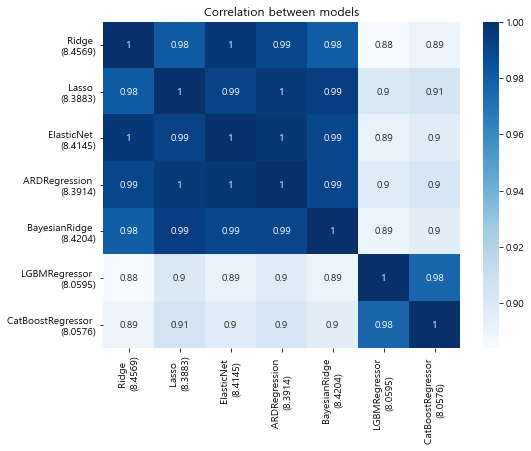

In [23]:
pred_results = []
for name, reg, reg_score in regs_trained:
    pred = list(reg.predict(x_dev))
    name = f'{name} \n({reg_score:.4f})'
    pred_results.append(pd.Series(pred, name=name))
ensemble_results = pd.concat(pred_results, axis=1)
ensemble_results = ensemble_results.applymap(lambda x: float(x))

# 모형의 예측값 간의 상관관계를 보기 위해 hitmap을 도식한다.
plt.figure(figsize = (8,6))
g = sns.heatmap(ensemble_results.corr(), annot=True, cmap='Blues')
g.set_title("Correlation between models")
plt.show()

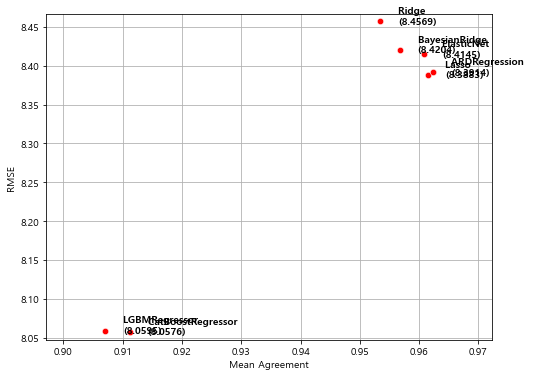

In [24]:
corr = (ensemble_results.corr().sum()-1)/(ensemble_results.corr().shape[0]-1)
names = corr.index
rmse = np.array(corr.index.str[-7:-1]).astype(float)
df = pd.DataFrame({'model': names, 'rmse': rmse, 'cor': corr})        

plt.figure(figsize=(8,6))
g = sns.scatterplot(x="cor", y="rmse", data=df, s=40, color='red')
for line in range(0, df.shape[0]):
     g.text(df.cor[line]+0.003, df.rmse[line]-0.003, 
            df.model[line], horizontalalignment='left', 
            size='medium', color='black', weight='semibold')
        
plt.xlim((df.cor.min()-0.01,df.cor.max()+0.01))
plt.ylim((df.rmse.min()-0.01,df.rmse.max()+0.01))
plt.xlabel('Mean Agreement')
plt.ylabel('RMSE')
plt.grid()
plt.show()

In [46]:
selected = [#'LinearRegression',
            #'Ridge',
            #'Lasso',
            #'ElasticNet',
            #'ARDRegression',
            #'BayesianRidge',
            #'RandomForestRegressor',
            #'XGBRegressor',
            'LGBMRegressor',
            'CatBoostRegressor',
            #'DeepNeuralNetwork'
            ]
models_for_ensemble = [(name,reg) for name,reg,score in regs_trained if name in selected]
results_for_ensemble = []
for name, model in models_for_ensemble:
    results_for_ensemble.append(model.predict(x_dev))
avg = (results_for_ensemble[0]+results_for_ensemble[1])/len(results_for_ensemble)
score = mean_squared_error(avg, y_dev, squared=False)
score

8.025963276466722

In [49]:
selected = [#'LinearRegression',
            #'Ridge',
            #'Lasso',
            'ElasticNet',
            #'ARDRegression',
            #'BayesianRidge',
            #'RandomForestRegressor',
            #'XGBRegressor',
            'LGBMRegressor',
            'CatBoostRegressor',
            #'DeepNeuralNetwork'
            ]
models_for_ensemble = [(name,reg) for name,reg,score in regs_trained if name in selected]
results_for_ensemble = []
weights_avg = []
rmse_best = 1000
for i in tqdm(range(1, 90, 1)):
    for j in range(1, 90, 1):
        for k in range(1, 90, 1):
            if (i+j+k) != 90:
                continue
            pred = (models_for_ensemble[0][1].predict(x_dev).flatten() * i + models_for_ensemble[1][1].predict(x_dev) * j
                    + models_for_ensemble[2][1].predict(x_dev) * k)/90
            rmse = np.sqrt(mean_squared_error(y_dev, pred))
            if rmse < rmse_best:
                weights_avg = [i,j,k]
                rmse_best = rmse 
                print(rmse, i,j,k)            

print(rmse_best, weights_avg)

  0%|                                                                                           | 0/89 [00:00<?, ?it/s]

8.054180387728339 1 1 88
8.052818242521399 1 2 87
8.051487982374386 1 3 86
8.050189623093917 1 4 85
8.048923180117631 1 5 84
8.047688668513274 1 6 83
8.046486102977815 1 7 82
8.04531549783657 1 8 81
8.044176867042372 1 9 80
8.043070224174727 1 10 79
8.041995582439014 1 11 78
8.040952954665714 1 12 77
8.039942353309632 1 13 76
8.03896379044917 1 14 75
8.0380172777856 1 15 74
8.037102826642377 1 16 73
8.036220447964457 1 17 72
8.035370152317645 1 18 71
8.034551949887975 1 19 70
8.033765850481089 1 20 69
8.033011863521656 1 21 68
8.03228999805282 1 22 67
8.031600262735635 1 23 66
8.030942665848572 1 24 65
8.030317215287013 1 25 64
8.02972391856277 1 26 63
8.029162782803647 1 27 62
8.028633814753011 1 28 61
8.028137020769382 1 29 60
8.027672406826051 1 30 59
8.027239978510732 1 31 58
8.02683974102521 1 32 57
8.026471699185043 1 33 56
8.026135857419268 1 34 55
8.02583221977013 1 35 54
8.025560789892841 1 36 53
8.02532157105537 1 37 52
8.025114566138226 1 38 51
8.024939777634305 1 39 50
8.02

  1%|▉                                                                               | 1/89 [02:19<3:25:03, 139.82s/it]

8.024436598991247 2 35 53
8.024178787984239 2 36 52
8.023953194408497 2 37 51
8.023759820981466 2 38 50
8.02359867003272 2 39 49
8.02346974350382 2 40 48
8.023373042948197 2 41 47
8.023308569531054 2 42 46
8.023276324029302 2 43 45
8.023276306831516 2 44 44


  2%|█▊                                                                              | 2/89 [04:41<3:24:31, 141.05s/it]

8.023177410802754 3 35 52
8.022933227533587 3 36 51
8.022721267495557 3 37 50
8.022541533242732 3 38 49
8.022394026941077 3 39 48
8.022278750368326 3 40 47
8.022195704913877 3 41 46
8.022144891578696 3 42 45
8.022126310975276 3 43 44


  3%|██▋                                                                             | 3/89 [06:51<3:14:47, 135.91s/it]

8.022054719450402 4 35 51
8.021824172097284 4 36 50
8.021625853182647 4 37 49
8.02145976509689 4 38 48
8.021325909842114 4 39 47
8.021224289031982 4 40 46
8.021154903891643 4 41 45
8.021117755257643 4 42 44
8.021112843577876 4 43 43


  4%|███▌                                                                            | 4/89 [09:01<3:09:18, 133.63s/it]

8.021068582249677 5 35 50
8.020851678299605 5 36 49
8.020667007401967 5 37 48
8.020514571783245 5 38 47
8.020394373281428 5 39 46
8.020306413345912 5 40 45
8.020250693037395 5 41 44
8.02022721302783 5 42 43


  6%|████▍                                                                           | 5/89 [11:14<3:06:39, 133.33s/it]

8.020219049571198 6 35 49
8.020015795818258 6 36 48
8.019844779137568 6 37 47
8.019706001591453 6 38 46
8.019599464853586 6 39 45
8.019525170208894 6 40 44
8.019483118553474 6 41 43
8.019473310394543 6 42 42


  7%|█████▍                                                                          | 6/89 [13:27<3:04:13, 133.17s/it]

8.019316567371728 7 36 47
8.019159210412855 7 37 46
8.019034095849205 7 38 45
8.018941225189954 7 39 44
8.018880599555397 7 40 43
8.01885221967689 7 41 42


  8%|██████▎                                                                         | 7/89 [15:32<2:58:20, 130.49s/it]

8.018754028708353 8 36 46
8.018610336279849 8 37 45
8.01849888891167 8 38 44
8.018419687948336 8 39 43
8.018372734345377 8 40 42
8.018358028669295 8 41 41


  9%|███████▏                                                                        | 8/89 [17:40<2:55:10, 129.76s/it]

8.018328208597211 9 36 45
8.01819818481024 9 37 44
8.01810040815272 9 38 43
8.018034879804372 9 39 42
8.018001600555857 9 40 41
8.018000570808734 9 41 40


 10%|████████                                                                        | 9/89 [19:39<2:48:40, 126.51s/it]

8.017922777088211 10 37 43
8.017838673957929 10 38 42
8.017786820444718 10 39 41
8.017767217174287 10 40 40


 11%|████████▉                                                                      | 10/89 [21:37<2:43:04, 123.85s/it]

8.017713699719362 11 38 41
8.017675522562014 11 39 40
8.017669596193688 11 40 39


 24%|██████████████████▋                                                            | 21/89 [42:24<2:17:19, 121.17s/it]


KeyboardInterrupt: 

In [51]:
w0,w1,w2 = weights_avg
selected = [#'LinearRegression',
            #'Ridge',
            #'Lasso',
            'ElasticNet',
            #'ARDRegression',
            #'BayesianRidge',
            #'RandomForestRegressor',
            #'XGBRegressor',
            'LGBMRegressor',
            'CatBoostRegressor',
            #'DeepNeuralNetwork'
            ]
models_for_ensemble = [(name,reg) for name,reg,score in regs_trained if name in selected]
results_for_ensemble = []
avg = (models_for_ensemble[0][1].predict(x_dev).flatten() * i + models_for_ensemble[1][1].predict(x_dev) * j
                    + models_for_ensemble[2][1].predict(x_dev) * k)/90

### Deep Neural Network

In [34]:
def reset_seeds(reset_graph_with_backend=None):
    if reset_graph_with_backend is not None:
        K = reset_graph_with_backend
        K.clear_session()
        tf.compat.v1.reset_default_graph()
        print("KERAS AND TENSORFLOW GRAPHS RESET")  # optional

    np.random.seed(99)
    # seed를 잘 설정하면 성능이 더 잘 오른다.
    random.seed(9)
    tf.compat.v1.set_random_seed(16)
#    os.environ['CUDA_VISIBLE_DEVICES'] = ''  # for GPU
    print("RANDOM SEEDS RESET")  # optional
   
reset_seeds()

RANDOM SEEDS RESET


In [35]:
i = int(round(x_train2.shape[0] * 0.8,0))
x_val, y_val = x_train2[i:], y_train2[i:]
x_train3, y_train3 = x_train2[:i], y_train2[:i]

In [36]:
def model_fn(hp):
    inputs = tf.keras.Input(shape=(x_train3.shape[1],))
    x = inputs
    for i in range(hp.Int('num_layers', 2, 4, step=1)):
        x = tf.keras.layers.Dense(hp.Int('unit_'+str(i), 16, 128, step=16),
                               activation=hp.Choice('activation',['relu','tanh']))(x)
        x = tf.keras.layers.Dropout(hp.Float('dropout_'+str(i), 0, 0.5, step=0.25, default=0.5))(x)
    outputs = tf.keras.layers.Dense(1, activation='linear')(x)
    model = tf.keras.Model(inputs, outputs)
    model.compile(loss='mse', 
                  optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])), 
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

In [37]:
# keras tuner는 튜닝 종류가 4종류가 있음: hyperband, grid search, random search, bayesian optimization
tuner = kt.Hyperband(model_fn,
                     objective=kt.Objective('val_root_mean_squared_error', direction="min"), 
                     max_epochs=30,
                     hyperband_iterations=2,
                     overwrite=True,
                     directory='dnn_tuning')
# objective: 튜닝 기준, hyperband_iterations:이거 자체에서 2번 반복
# overwrite: False시, 기존을 근거로 해 재학습 안시킴

tuner.search(x_train3, y_train3, validation_data=(x_val, y_val),
             callbacks=[tf.keras.callbacks.EarlyStopping()])
# 빨리 끝내려고 파라미터 저렇게 설정한 것임

Trial 180 Complete [00h 00m 04s]
val_root_mean_squared_error: 8.960451126098633

Best val_root_mean_squared_error So Far: 8.131829261779785
Total elapsed time: 00h 10m 39s
INFO:tensorflow:Oracle triggered exit


In [38]:
tuner.results_summary(1) # 1= 제일 성능이 좋은 놈

Results summary
Results in dnn_tuning\untitled_project
Showing 1 best trials
Objective(name='val_root_mean_squared_error', direction='min')
Trial summary
Hyperparameters:
num_layers: 3
unit_0: 48
activation: relu
dropout_0: 0.25
unit_1: 32
dropout_1: 0.0
learning_rate: 0.01
unit_2: 112
dropout_2: 0.5
unit_3: 96
dropout_3: 0.25
tuner/epochs: 30
tuner/initial_epoch: 10
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 313e28409fe8b1b9f7db908c8db51b90
Score: 8.131829261779785


In [39]:
# Loss & RMSE
dnn = tuner.get_best_models(1)[0] # best model 중 가장 좋은 모델
dnn.evaluate(x_dev, y_dev)

203/203 [==============================] - 0s 972us/step - loss: 72.1756 - root_mean_squared_error: 8.4949


[72.60430908203125, 8.5208158493042]

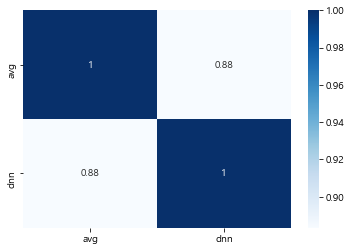

In [42]:
sns.heatmap(pd.DataFrame({'avg':avg,'dnn':dnn.predict(x_dev).flatten()}).corr(),annot=True,cmap='Blues')
plt.show()

In [52]:
weights_avg = []
rmse_best = 1000
for i in tqdm(range(1, 100, 1)):
    for j in range(1, 100, 1):
        if (i+j) != 100:
            continue
        pred = (avg *i+ dnn.predict(x_dev).flatten() * j)/100
        rmse = np.sqrt(mean_squared_error(y_dev, pred))
        if rmse < rmse_best:
            weights_avg = [i,j]
            rmse_best = rmse 
            print(rmse, i,j)            

print(rmse_best, weights_avg)

  2%|█▋                                                                                 | 2/99 [00:00<00:17,  5.60it/s]

8.511642318984439 1 99
8.50254813865657 2 98


  4%|███▎                                                                               | 4/99 [00:00<00:16,  5.63it/s]

8.493532871334484 3 97
8.48459673813549 4 96


  6%|█████                                                                              | 6/99 [00:01<00:16,  5.59it/s]

8.47574004679649 5 95
8.46696303619661 6 94


  8%|██████▋                                                                            | 8/99 [00:01<00:17,  5.30it/s]

8.458265940169197 7 93
8.449649003007728 8 92


 10%|████████▎                                                                         | 10/99 [00:01<00:16,  5.26it/s]

8.441112488540677 9 91
8.432656633476237 10 90


 12%|█████████▉                                                                        | 12/99 [00:02<00:16,  5.41it/s]

8.424281703693255 11 89
8.41598785979953 12 88


 14%|███████████▌                                                                      | 14/99 [00:02<00:16,  5.30it/s]

8.407775415935664 13 87
8.399644586699507 14 86


 16%|█████████████▎                                                                    | 16/99 [00:02<00:15,  5.49it/s]

8.391595641248568 15 85
8.383628777228068 16 84


 18%|██████████████▉                                                                   | 18/99 [00:03<00:14,  5.50it/s]

8.375744233972078 17 83
8.367942252542045 18 82


 20%|████████████████▌                                                                 | 20/99 [00:03<00:14,  5.60it/s]

8.360223064685233 19 81
8.352586900425397 20 80


 21%|█████████████████▍                                                                | 21/99 [00:03<00:14,  5.39it/s]

8.345033977099257 21 79
8.337564543280962 22 78


 23%|███████████████████                                                               | 23/99 [00:04<00:14,  5.30it/s]

8.330178788699977 23 77


 25%|████████████████████▋                                                             | 25/99 [00:04<00:13,  5.46it/s]

8.322876971254134 24 76
8.315659293072171 25 75


 27%|██████████████████████▎                                                           | 27/99 [00:04<00:12,  5.56it/s]

8.308525987108158 26 74
8.301477240109755 27 73


 28%|███████████████████████▏                                                          | 28/99 [00:05<00:12,  5.52it/s]

8.294513289614008 28 72


 30%|████████████████████████▊                                                         | 30/99 [00:05<00:13,  5.29it/s]

8.287634347902202 29 71
8.280840654628408 30 70


 32%|██████████████████████████▌                                                       | 32/99 [00:05<00:12,  5.52it/s]

8.27413238578804 31 69
8.267509734686563 32 68


 34%|████████████████████████████▏                                                     | 34/99 [00:06<00:11,  5.57it/s]

8.260972925110405 33 67
8.254522193679295 34 66


 36%|█████████████████████████████▊                                                    | 36/99 [00:06<00:10,  5.86it/s]

8.24815770551262 35 65
8.241879651761005 36 64


 38%|███████████████████████████████▍                                                  | 38/99 [00:06<00:10,  5.79it/s]

8.235688248728819 37 63
8.229583703147778 38 62


 40%|█████████████████████████████████▏                                                | 40/99 [00:07<00:10,  5.65it/s]

8.223566201044768 39 61
8.217635900415196 40 60


 42%|██████████████████████████████████▊                                               | 42/99 [00:07<00:09,  5.74it/s]

8.21179302320744 41 59
8.206037766370219 42 58


 43%|███████████████████████████████████▌                                              | 43/99 [00:07<00:09,  5.68it/s]

8.200370313307447 43 57


 44%|████████████████████████████████████▍                                             | 44/99 [00:08<00:10,  5.39it/s]

8.1947907928376 44 56


 46%|██████████████████████████████████████                                            | 46/99 [00:08<00:09,  5.37it/s]

8.189299426629804 45 55
8.183896408175706 46 54


 48%|███████████████████████████████████████▊                                          | 48/99 [00:08<00:09,  5.37it/s]

8.178581899801955 47 53
8.173356049839958 48 52


 51%|█████████████████████████████████████████▍                                        | 50/99 [00:09<00:08,  5.53it/s]

8.168219044164042 49 51
8.16317106173409 50 50


 53%|███████████████████████████████████████████                                       | 52/99 [00:09<00:08,  5.62it/s]

8.158212258673956 51 49
8.153342789978112 52 48


 55%|████████████████████████████████████████████▋                                     | 54/99 [00:09<00:08,  5.50it/s]

8.148562830221264 53 47
8.143872523928028 54 46


 57%|██████████████████████████████████████████████▍                                   | 56/99 [00:10<00:07,  5.43it/s]

8.139272035995502 55 45
8.134761520174846 56 44


 59%|████████████████████████████████████████████████                                  | 58/99 [00:10<00:07,  5.53it/s]

8.130341102488387 57 43
8.126010969378056 58 42


 61%|█████████████████████████████████████████████████▋                                | 60/99 [00:10<00:07,  5.35it/s]

8.12177123580825 59 41
8.117622053251106 60 40


 63%|███████████████████████████████████████████████████▎                              | 62/99 [00:11<00:06,  5.64it/s]

8.113563559235008 61 39
8.109595889481911 62 38


 65%|█████████████████████████████████████████████████████                             | 64/99 [00:11<00:06,  5.55it/s]

8.105719182919833 63 37
8.101933549482121 64 36


 67%|██████████████████████████████████████████████████████▋                           | 66/99 [00:12<00:05,  5.52it/s]

8.098239147393999 65 35
8.094636081759749 66 34


 69%|████████████████████████████████████████████████████████▎                         | 68/99 [00:12<00:05,  5.73it/s]

8.091124479412946 67 33
8.087704459832098 68 32


 71%|█████████████████████████████████████████████████████████▉                        | 70/99 [00:12<00:05,  5.51it/s]

8.084376139039886 69 31
8.081139629230725 70 30


 73%|███████████████████████████████████████████████████████████▋                      | 72/99 [00:13<00:05,  5.29it/s]

8.07799504211253 71 29
8.07494248901165 72 28


 75%|█████████████████████████████████████████████████████████████▎                    | 74/99 [00:13<00:04,  5.50it/s]

8.071982063789571 73 27
8.069113881465206 74 26


 77%|██████████████████████████████████████████████████████████████▉                   | 76/99 [00:13<00:04,  5.36it/s]

8.06633802854612 75 25
8.063654605362627 76 24


 79%|████████████████████████████████████████████████████████████████▌                 | 78/99 [00:14<00:03,  5.38it/s]

8.061063705414812 77 23
8.058565419357759 78 22


 81%|██████████████████████████████████████████████████████████████████▎               | 80/99 [00:14<00:03,  5.66it/s]

8.056159823641835 79 21
8.053847011890905 80 20


 83%|███████████████████████████████████████████████████████████████████▉              | 82/99 [00:14<00:03,  5.42it/s]

8.051627060148443 81 19
8.049500041849639 82 18


 85%|█████████████████████████████████████████████████████████████████████▌            | 84/99 [00:15<00:02,  5.43it/s]

8.047466039255479 83 17
8.045525115270244 84 16


 87%|███████████████████████████████████████████████████████████████████████▏          | 86/99 [00:15<00:02,  5.47it/s]

8.043677339307292 85 15
8.041922777909184 86 14


 89%|████████████████████████████████████████████████████████████████████████▉         | 88/99 [00:16<00:01,  5.51it/s]

8.040261489334549 87 13
8.038693531731116 88 12


 91%|██████████████████████████████████████████████████████████████████████████▌       | 90/99 [00:16<00:01,  5.38it/s]

8.037218963814793 89 11
8.03583782973479 90 10


 93%|████████████████████████████████████████████████████████████████████████████▏     | 92/99 [00:16<00:01,  5.60it/s]

8.034550181577826 91 9
8.03335606637425 92 8


 95%|█████████████████████████████████████████████████████████████████████████████▊    | 94/99 [00:17<00:00,  5.47it/s]

8.03225552269115 93 7
8.031248589479459 94 6


 97%|███████████████████████████████████████████████████████████████████████████████▌  | 96/99 [00:17<00:00,  5.44it/s]

8.030335303740237 95 5
8.02951569534712 96 4


 99%|█████████████████████████████████████████████████████████████████████████████████▏| 98/99 [00:17<00:00,  5.48it/s]

8.028789793604773 97 3
8.028157624744457 98 2


100%|██████████████████████████████████████████████████████████████████████████████████| 99/99 [00:18<00:00,  5.48it/s]

8.027619209989721 99 1
8.027619209989721 [99, 1]


### Deployment

In [88]:
w0,w1,w2 = [11, 40, 39]
selected = [#'LinearRegression',
            #'Ridge',
            #'Lasso',
            'ElasticNet',
            #'ARDRegression',
            #'BayesianRidge',
            #'RandomForestRegressor',
            #'XGBRegressor',
            'LGBMRegressor',
            'CatBoostRegressor',
            #'DeepNeuralNetwork'
            ]
models_for_ensemble = [(name,reg) for name,reg,score in regs_trained if name in selected]
results_for_ensemble = []
avg = (models_for_ensemble[0][1].predict(x_dev).flatten() * w0 + models_for_ensemble[1][1].predict(x_dev) * w1
                    + models_for_ensemble[2][1].predict(x_dev) * w2)/90
pd.DataFrame({'age':avg}).to_csv('1등feature모델링_dev.csv', index=False)

In [84]:
w0,w1,w2 = [11, 40, 39]
selected = [#'LinearRegression',
            #'Ridge',
            #'Lasso',
            'ElasticNet',
            #'ARDRegression',
            #'BayesianRidge',
            #'RandomForestRegressor',
            #'XGBRegressor',
            'LGBMRegressor',
            'CatBoostRegressor',
            #'DeepNeuralNetwork'
            ]
models_for_ensemble = [(name,reg) for name,reg in regs_trained_for_submissions if name in selected]
results_for_ensemble = []
avg = (models_for_ensemble[0][1].predict(x_test).flatten() * w0 + models_for_ensemble[1][1].predict(x_test) * w1
                    + models_for_ensemble[2][1].predict(x_test) * w2)/90
pd.DataFrame({'custid': test_id, 'age':avg}).to_csv('1등feature모델링.csv', index=False)